# <span style="color:blue">  Esercitazione 11</span>

In questa esercitazione si utilizza la libreria Keras per simulare reti neurali sequenziali per risolvere problemi di regressione. In particolare, si studia per primo un problema di base come il fit di una funzione lineare. Infatti, è sufficiente l'uso di un solo neurone essendo questo caratterizzato da un peso e da un bias, che sono proprio i parametri di un fit lineare (pendenza ed intercetta). In secondo luogo, il problema viene esteso al fit di un polinomio di terzo grado. La rete neurale viene quindi estesa sia in numero di strati (layers) che in numero di neuroni per strato. Questo ci permette anche di studiare la dipendenza della rete da funzioni di attivazione, funzione costo e ottimizzatore. Infine, si affronta in maniera analoga un problema di fit di una funzione $\mathbb{R}^2\rightarrow\mathbb{R}$.

## Esercizio 11.1 - Implementazione

In [85]:
import numpy as np

# f(x) = mx + b
def linear (x, m, b):
    return m * x + b
    
m = 2 # Pendenza di f(x)
b = 1 # Intercetta di f(x)

num_train = 1000 #  Numero elementi di training
num_valid = 50 # Numero elementi di validazione
sigma = 1.0 # Deviazione standard rumore

# Genera elementi di training e di validazione
np.random.seed(0)
x_train = np.random.uniform(-1, 1, num_train)
x_valid = np.random.uniform(-1, 1, num_valid)
x_valid.sort()
y_target = linear(x_valid, m, b) # Funzione ideale (target)

y_train = np.random.normal(linear(x_train, m, b), sigma) # Elementi di training
y_valid = np.random.normal(linear(x_valid, m, b), sigma) # Elementi di validazione

In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

import json

# Compone modello NN
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# Compone modello scegliendo ottimizzatore, funzione costo e metrica
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Fit del modello usando dati di training e confronto con dati validazione
batch_size = 32
epochs = 50
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch_size, # Numero di batch
          epochs=epochs, # Numeri di epoche
          shuffle=True, # Shuffle dati input
          validation_data=(x_valid, y_valid),
          verbose=0)

# Salvataggio del modello
model.save(f"./Ex_11_1/model_{epochs}_{num_train}_{int(sigma*100)}.keras", include_optimizer=True)

# Salvataggio history del modello
with open(f"./Ex_11_1/history_{epochs}_{num_train}_{int(sigma*100)}.json", 'w') as f:
    json.dump(history.history, f)

In [56]:
# Riapertura modello e history (test)

model = tf.keras.models.load_model(filepath=f"./Ex_11_1/model_{epochs}_{num_train}_{int(sigma*100)}.keras")
with open(f"./Ex_11_1/history_{epochs}_{num_train}_{int(sigma*100)}.json", 'r') as f:
    history = json.load(f)

In [57]:
# Stampa pesi e bias
model.get_weights()

[array([[2.100506]], dtype=float32), array([0.8931162], dtype=float32)]

In [58]:
# Valuta modello rispetto dati validazione
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# Stampa parametri di performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1342 - mse: 1.1342  

Test loss: 1.114601492881775
Test accuracy: 1.114601492881775


In [59]:
# Valuta modello rispetto a curva esatta
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# Stampa parametri di performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0181 - mse: 0.0181 

Test loss: 0.01577117294073105
Test accuracy: 0.01577117294073105


## Esercizio 11.1 - Risultati

Come primo esercizio si analizza l'utilizzo di un una rete neurale come strumento di fit lineare. Poiché un singolo neurone è caratterizzato da un peso e da un bias, è sufficiente realizzare una rete neurale con un singolo input (il valore dell'ascissa $x$), un solo strato intermedio con singolo neurone e un output singolo (l'ordinata $y$). I parametri ottimizzati della rete corrispondono esattamente ai due parametri del fit.

In particolare, si studia la bontà del modello variando alcuni parametri come il numero di elementi di addestramento della rete (training data), il numero di epoche dell'addestramento della rete e il rumore statistico sui dati da fittare. Infatti, l'accuratezza delle rete si basa anche sulla capacità di fittare dati con rumore statistico e quindi prevedere correttamente l'output partendo da un set completamente nuovo di dati. 

L'obiettivo è riprodurre la funzione target $y=2x+1$ sull'intervallo $x\in[-1,1]$ su cui sono geneati i dati di addestramento e di validazione della rete. Come ottimizzatore si utilizza SGD (Stochastic Gradient Descent) e come funzione costo MSE (Mean Squared Error).

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


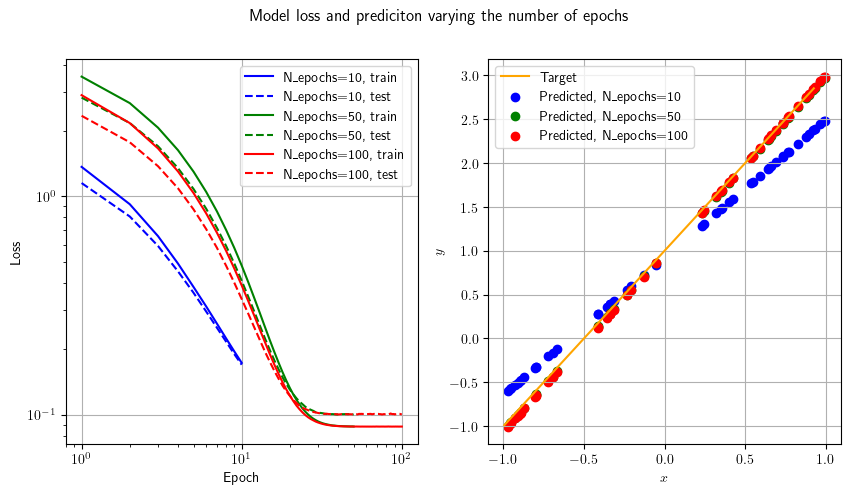

In [60]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.models import load_model

import json

# Caricamento dei modelli per N_epochs = 10, 50, 100
model1 = tf.keras.models.load_model(filepath='./Ex_11_1/model_10_500_30.keras')
model2 = tf.keras.models.load_model(filepath='./Ex_11_1/model_50_500_30.keras')
model3 = tf.keras.models.load_model(filepath='./Ex_11_1/model_100_500_30.keras')

# Caricamento delle histories per N_epochs = 10, 50, 100
with open('./Ex_11_1/history_10_500_30.json', 'r') as f:
    history1 = json.load(f)
with open('./Ex_11_1/history_50_500_30.json', 'r') as f:
    history2 = json.load(f)
with open('./Ex_11_1/history_100_500_30.json', 'r') as f:
    history3 = json.load(f)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Model loss and prediciton varying the number of epochs')

# Grafico di sinistra: funzione costo di training e di validazione
plt.subplot(1,2,1)
plt.plot(np.linspace(1, 10, 10), history1['loss'], c='blue', label='N_epochs=10, train')
plt.plot(np.linspace(1, 10, 10), history1['val_loss'], c='blue', linestyle='dashed', label='N_epochs=10, test')
plt.plot(np.linspace(1, 50, 50), history2['loss'], c='green', label='N_epochs=50, train')
plt.plot(np.linspace(1, 50, 50), history2['val_loss'], c='green', linestyle='dashed', label='N_epochs=50, test')
plt.plot(np.linspace(1, 100, 100), history3['loss'], c='red', label='N_epochs=100, train')
plt.plot(np.linspace(1, 100, 100), history3['val_loss'], c='red', linestyle='dashed', label='N_epochs=100, test')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Grafico di destra: confronto tra funzione target e predizione
plt.subplot(1,2,2)
plt.plot(x_valid, y_target, c='orange', label='Target')
x_predicted = np.random.uniform(-1, 1, 50)
y1_predicted = model1.predict(x_predicted)
y2_predicted = model2.predict(x_predicted)
y3_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y1_predicted, color='blue', label='Predicted, N_epochs=10')
plt.scatter(x_predicted, y2_predicted, color='green', label='Predicted, N_epochs=50')
plt.scatter(x_predicted, y3_predicted, color='red', label='Predicted, N_epochs=100')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)

plt.show()

Per prima cosa, si è studiato come varia la qualità della rete neurale variando il numero di epoche di addestramento. Si è posto $N_{tr}=500$ come numero di dati di addestramento, mentre il rumore gaussiano è stato fissato a $\sigma=0.3$. Osserviamo che nel caso in cui il numero di epoche è pari a $10$ la funzione costo non raggiunge il plateau, raggiunto invece nel caso in cui il numero di epoche è $50$ oppure $100$. Si può quindi affermare che l'addestramento della rete è incompleto nel primo caso, mentre si può dire completo per i restanti due casi. Questo si ripercuote sul grado di ricostruzione della funzione target partendo da un set completamente nuovo di valori di ascisse. 

Vediamo, tuttavia, che aumentare eccessivamente il numero di epoche non si traduce in un miglioramento dei parametri della rete. Questo è evidenziato dal fatto che la funzione costo raggiunge il plateau ad una determinata epoca e l'addestramento della rete può dirsi concluso in corrispondenza di questa. L'addestramento della rete oltre quest'epoca non si traduce in un miglioramento della stessa.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


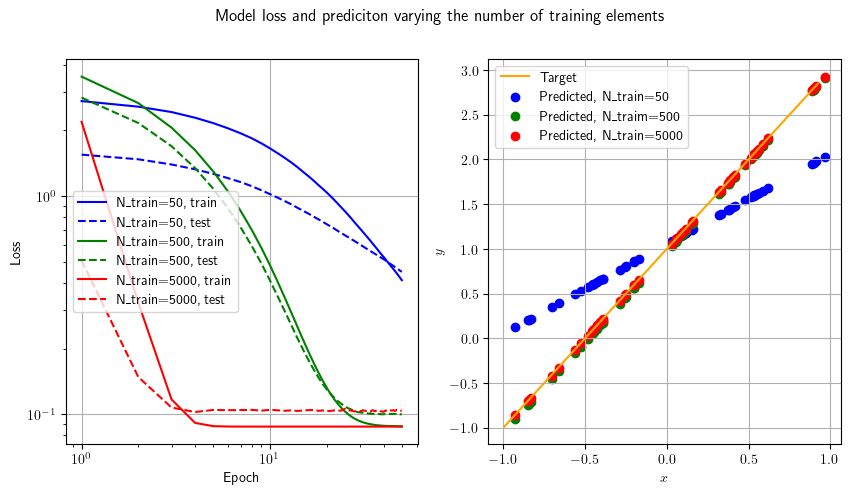

In [61]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.models import load_model

import json

# Caricamento dei modelli per N_train = 50, 500, 5000
model1 = tf.keras.models.load_model(filepath='./Ex_11_1/model_50_50_30.keras')
model2 = tf.keras.models.load_model(filepath='./Ex_11_1/model_50_500_30.keras')
model3 = tf.keras.models.load_model(filepath='./Ex_11_1/model_50_5000_30.keras')

# Caricamento delle histories per N_train = 50, 500, 5000
with open('./Ex_11_1/history_50_50_30.json', 'r') as f:
    history1 = json.load(f)
with open('./Ex_11_1/history_50_500_30.json', 'r') as f:
    history2 = json.load(f)
with open('./Ex_11_1/history_50_5000_30.json', 'r') as f:
    history3 = json.load(f)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Model loss and prediciton varying the number of training elements')

# Grafico di sinistra: funzione costo di training e di validazione
plt.subplot(1,2,1)
plt.plot(np.linspace(1, 50, 50), history1['loss'], c='blue', label='N_train=50, train')
plt.plot(np.linspace(1, 50, 50), history1['val_loss'], c='blue', linestyle='dashed', label='N_train=50, test')
plt.plot(np.linspace(1, 50, 50), history2['loss'], c='green', label='N_train=500, train')
plt.plot(np.linspace(1, 50, 50), history2['val_loss'], c='green', linestyle='dashed', label='N_train=500, test')
plt.plot(np.linspace(1, 50, 50), history3['loss'], c='red', label='N_train=5000, train')
plt.plot(np.linspace(1, 50, 50), history3['val_loss'], c='red', linestyle='dashed', label='N_train=5000, test')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Grafico di destra: confronto tra funzione target e predizione
plt.subplot(1,2,2)
plt.plot(x_valid, y_target, c='orange', label='Target')
x_predicted = np.random.uniform(-1, 1, 50)
y1_predicted = model1.predict(x_predicted)
y2_predicted = model2.predict(x_predicted)
y3_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y1_predicted, color='blue', label='Predicted, N_train=50')
plt.scatter(x_predicted, y2_predicted, color='green', label='Predicted, N_traim=500')
plt.scatter(x_predicted, y3_predicted, color='red', label='Predicted, N_train=5000')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)

plt.show()

Si è poi studiato come variano i parametri della rete al variare del numero dei dati di addestramento. Si sono fissate 50 epoche di addestramento e $\sigma=0.3$. Quello che si osserva è che un numero crescente di dati aiuta sicuramente la rete a performare meglio. Questo è evidente confrontando il caso $N_{tr}=50$ con $N_{tr}=500$. Un miglioramento si ha ulteriormente per $N_{tr}=5000$, anche se la maggior accuratezza è raggiunta a spese di un tempo di addestramento della rete più lungo. In generale, l'incremento in accuratezza non è proporzionale all'aumento del numero di dati di addestramento e va infine a saturazione. Aumentare eccessivamente le dimensioni del set di dati può quindi diventare alla lunga controproducente.

Recuperando le considerazioni fatte in precedenza sul numero di epoche, concludiamo che è necessario scegliere un opportuno bilanciamento fra numero di epoche e numero di dati di addestramento. Un grande numero di dati aiuta a ridurre il numero di epoche necessarie all'addestramento alle spese di un maggior tempo di addestramento per epoca. Viceversa, un set più piccolo velocizza l'addestramento per una singola epoca alle spese di un maggior numero di epoche richieste.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


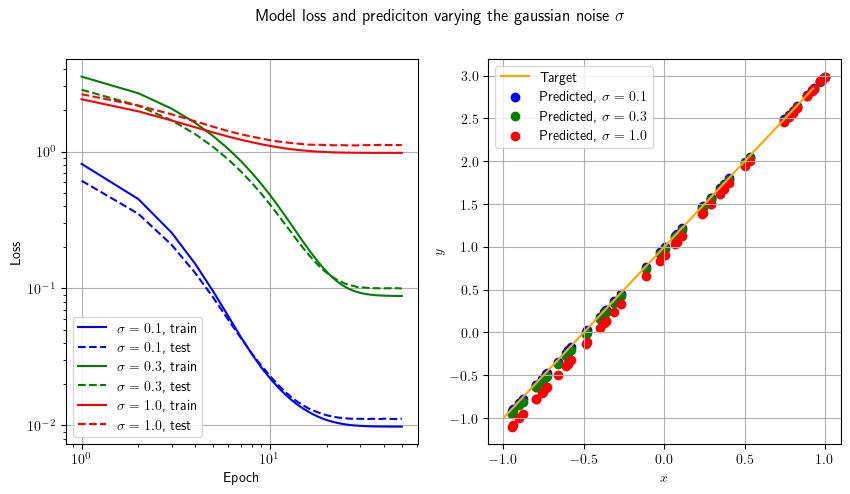

In [62]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.models import load_model

import json

# Caricamento dei modelli per sigma = 0.1, 0.3, 1.0
model1 = tf.keras.models.load_model(filepath='./Ex_11_1/model_50_500_10.keras')
model2 = tf.keras.models.load_model(filepath='./Ex_11_1/model_50_500_30.keras')
model3 = tf.keras.models.load_model(filepath='./Ex_11_1/model_50_500_100.keras')

# Caricamento delle histories per sigma = 0.1, 0.3, 1.0
with open('./Ex_11_1/history_50_500_10.json', 'r') as f:
    history1 = json.load(f)
with open('./Ex_11_1/history_50_500_30.json', 'r') as f:
    history2 = json.load(f)
with open('./Ex_11_1/history_50_500_100.json', 'r') as f:
    history3 = json.load(f)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Model loss and prediciton varying the gaussian noise $\sigma$')

# Grafico di sinistra: funzione costo di training e di validazione
plt.subplot(1,2,1)
plt.plot(np.linspace(1, 50, 50), history1['loss'], c='blue', label='$\sigma=0.1$, train')
plt.plot(np.linspace(1, 50, 50), history1['val_loss'], c='blue', linestyle='dashed', label='$\sigma=0.1$, test')
plt.plot(np.linspace(1, 50, 50), history2['loss'], c='green', label='$\sigma=0.3$, train')
plt.plot(np.linspace(1, 50, 50), history2['val_loss'], c='green', linestyle='dashed', label='$\sigma=0.3$, test')
plt.plot(np.linspace(1, 50, 50), history3['loss'], c='red', label='$\sigma=1.0$, train')
plt.plot(np.linspace(1, 50, 50), history3['val_loss'], c='red', linestyle='dashed', label='$\sigma=1.0$, test')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Grafico di destra: confronto tra funzione target e predizione
plt.subplot(1,2,2)
plt.plot(x_valid, y_target, c='orange', label='Target')
x_predicted = np.random.uniform(-1, 1, 50)
y1_predicted = model1.predict(x_predicted)
y2_predicted = model2.predict(x_predicted)
y3_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y1_predicted, color='blue', label='Predicted, $\sigma=0.1$')
plt.scatter(x_predicted, y2_predicted, color='green', label='Predicted, $\sigma=0.3$')
plt.scatter(x_predicted, y3_predicted, color='red', label='Predicted, $\sigma=1.0$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)

plt.show()

Infine, si sono fissati $N_{tr}=500$, $N_{ep}=50$ e si è fatto variare il rumore gaussiano $\sigma$. A conferma di quanto si può intuire osserviamo due cose:
- la funzione costo satura a valori maggiori per $\sigma$ crescente a conferma del fatto che c'è una maggiore dispersione dei dati rispetto all'andamento della funzione target;
- a parità di numero di epoche e dati di addestramento, la precisione del modello diminuisce aumentando $\sigma$, questo per via della maggiore difficoltà della rete a ricostruire l'esatto andamento della funzione target.

## Esercizio 11.2 - Implementazione

In [61]:
import numpy as np

# Definizione polinomio terzo grado
def cubic (x, a, b, c, d):
    return a + b * x + c * x ** 2 + d * x ** 3 
a, b, c, d = 4, -3, -2, 3

num_train = 5000 #  Numero elementi di training
num_valid = 100 # Numero elementi di validazione
sigma = 0.9 # Deviazione standard rumore

# Genera elementi di training e di validazione
np.random.seed(0)
x_train = np.random.uniform(-1, 1, num_train)
x_valid = np.random.uniform(-1, 1, num_valid)
x_valid.sort()
y_target = cubic(x_valid, a, b, c, d) # Funzione ideale

y_train = np.random.normal(cubic(x_train, a, b, c, d), sigma) # Elementi di training
y_valid = np.random.normal(cubic(x_valid, a, b, c, d), sigma) # Elementi di validazione

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

import json

# Compone modello NN
model = tf.keras.Sequential()
model.add(Dense(256, input_shape=(1,), activation='relu'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

# Compone modello scegliendo ottimizzatore, funzione costo e metrica
model.compile(optimizer='adagrad', loss='mse', metrics=['mse'])

# Fit del modello usando dati di training e confronto con dati validazione
batch_size = 32
epochs = 50
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch_size, # Numero di batch
          epochs=epochs, # Numeri di epoche
          shuffle=True, # Shuffle dati input
          validation_data=(x_valid, y_valid),
          verbose=0)

# Salvataggio del modello
model.save("./Ex_11_2/Cubic_sigma_09.keras", include_optimizer='True')

# Salvataggio history del modello
with open("./Ex_11_2/Cubic_sigma_09.json", 'w') as f:
    json.dump(history.history, f)

## Esercizio 11.2 - Risultati

Nel secondo esercizio si analizza una situazione in parte simile al caso precedente, ovvero si fitta un polinomio di terzo grado. La differenza è che ora si rende necessario aumentare sia il numero di strati che di neuroni della rete, oltre a dover opportunamente scegliere una combinazione di funzioni di attivazione, ottimizzatore e funzione costo. Questi parametri sono stati quindi variati per analizzare in quali situazioni si osservano dei miglioramenti della rete neurale.

Per quanto riguarda le dimensioni della rete (numero strati e numero neuroni), in genere si osserva che una rete più grande, e quindi con un maggior numero di parametri, aiuta ai fini della qualità del modello, purché non si ecceda cadendo in situazioni di overfitting (ad esempio se anziché ricostruire l'andamento polinomiale viene fittato il rumore). Si è quindi scelto di lavorare con una rete di 5 strati da 256 neuroni ciascuno.

La rete viene addestrata con 5000 dati di addestramento e 50 epoche. Si è inoltre scelto di applicare un rumore gaussiano $\sigma=0.3$. L'obiettivo è fittare la funzione $y=4-3x-2x^2+3x^3$ sull'intervallo $x\in[-1,1]$. Di seguito sono riportati i risultati in cui si sono utilizzate diverse combinazioni di funzioni di attivazione, funzione costo e ottimizzatore.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


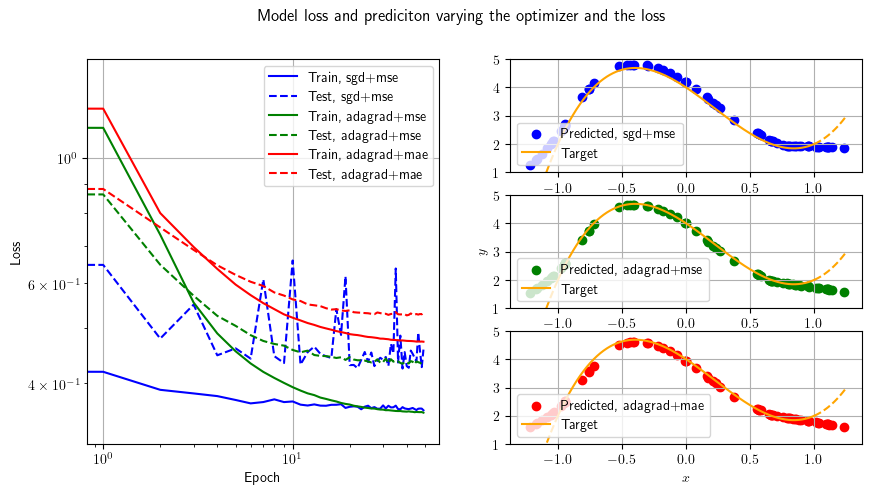

In [69]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.models import load_model

import json

# Caricamento dei modelli
model1 = tf.keras.models.load_model(filepath='./Ex_11_2/Cubic_5x256_rtrtr_sgd_mse.keras')
model2 = tf.keras.models.load_model(filepath='./Ex_11_2/Cubic_5x256_rtrtr_adagrad_mse.keras')
model3 = tf.keras.models.load_model(filepath='./Ex_11_2/Cubic_5x256_rtrtr_adagrad_mae.keras')

# Caricamento delle histories
with open('./Ex_11_2/Cubic_5x256_rtrtr_sgd_mse.json', 'r') as f:
    history1 = json.load(f)
with open('./Ex_11_2/Cubic_5x256_rtrtr_adagrad_mse.json', 'r') as f:
    history2 = json.load(f)
with open('./Ex_11_2/Cubic_5x256_rtrtr_adagrad_mae.json', 'r') as f:
    history3 = json.load(f)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Model loss and prediciton varying the optimizer and the loss')

# Grafico di sinistra: funzione costo di training e di validazione
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=3)
ax1.plot(history1['loss'], c='b', label='Train, sgd+mse')
ax1.plot(history1['val_loss'], c='b', linestyle='dashed', label='Test, sgd+mse')
ax1.plot(history2['loss'], c='g', label='Train, adagrad+mse')
ax1.plot(history2['val_loss'], c='g', linestyle='dashed', label='Test, adagrad+mse')
ax1.plot(history3['loss'], c='r', label='Train, adagrad+mae')
ax1.plot(history3['val_loss'], c='r', linestyle='dashed', label='Test, adagrad+mae')

ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(top=1.5)
ax1.legend()
ax1.grid(True)

# Grafico di destra: confronto tra funzione target e predizione
x_predicted = np.random.uniform(-1.25, 1.25, 75)
x_predicted.sort()
x1_target = np.linspace(-1, 1, 1000)
x2_target = np.linspace(-1.25, -1, 100)
x3_target = np.linspace(1, 1.25, 100)
y1_target = cubic(x1_target, a, b, c, d)
y2_target = cubic(x2_target, a, b, c, d)
y3_target = cubic(x3_target, a, b, c, d)

ax2 = plt.subplot2grid((3, 2), (0, 1))
y1_predicted = model1.predict(x_predicted)
ax2.scatter(x_predicted, y1_predicted, color='b', label='Predicted, sgd+mse')
ax2.plot(x1_target, y1_target, c='orange', label='Target')
ax2.plot(x2_target, y2_target, c='orange', linestyle='dashed')
ax2.plot(x3_target, y3_target, c='orange', linestyle='dashed')

ax2.set_ylim(1,5)
ax2.legend()
ax2.grid(True)

ax3 = plt.subplot2grid((3, 2), (1, 1))
y2_predicted = model2.predict(x_predicted)
ax3.scatter(x_predicted, y2_predicted, color='g', label='Predicted, adagrad+mse')
ax3.plot(x1_target, y1_target, c='orange', label='Target')
ax3.plot(x2_target, y2_target, c='orange', linestyle='dashed')
ax3.plot(x3_target, y3_target, c='orange', linestyle='dashed')

ax3.set_ylim(1,5)
ax3.set_ylabel('$y$')
ax3.legend()
ax3.grid(True)

ax4 = plt.subplot2grid((3, 2), (2, 1))
y3_predicted = model3.predict(x_predicted)
ax4.scatter(x_predicted, y3_predicted, color='r', label='Predicted, adagrad+mae')
ax4.plot(x1_target, y1_target, c='orange', label='Target')
ax4.plot(x2_target, y2_target, c='orange', linestyle='dashed')
ax4.plot(x3_target, y3_target, c='orange', linestyle='dashed')

ax4.set_ylim(1,5)
ax4.set_xlabel('$x$')
ax4.legend()
ax4.grid(True)

plt.show()

Come funzioni di attivazione si è optato per una struttura mista di ReLU e tanh, questo per garantire una maggiore espressività della rete. Fissata quindi la struttura e le funzioni di attivazione, si sono utilizzate tre combinazioni differenti di funzione costo e ottimizzatore. 

Quello che si osserva è che Adagrad sembra portare ad una maggiore stabilità della funzione costo dei dati di validazione rispetto a SGD, che presenta invece delle fluttuazioni. Questo potrebbe seguire dal fatto che Adagrad utilizza un tasso di apprendimento variabile in funzione della frequenza di aggiornamento dei parametri. Al contrario, SGD ha un tasso di apprendimento costante.

Come funzioni costo si sono utilizzate MSE (Mean Squared Error) e MAE (Mean Absolute Error) in combinazione con Adagrad (essendo l'opzione meglio performante). Sembrerebbe che MSE porti a risultati migliori, forse dovuto al fatto che gli errori grandi sono maggiormente penalizzati.

Osserviamo, infine, che i dati di predizione seguono molto bene la funzione di test nell'intervallo $x\in[-1,1]$ su cui la rete è stata addestrata. Al contrario, la predizione fallisce al di fuori di questo intervallo. Concludiamo che le reti neurali non sono in grado di estrapolare dati al di fuori del range sui cono specificamente addestrate.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


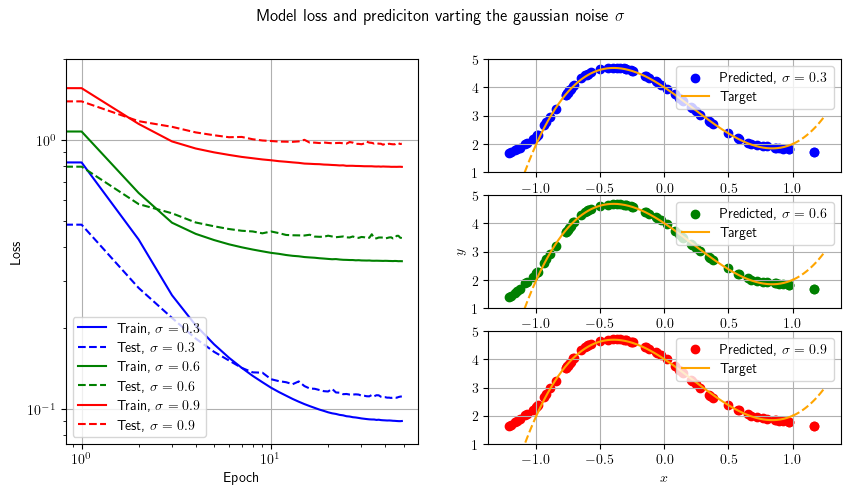

In [70]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.models import load_model

import json

# Caricamento dei modelli
model1 = tf.keras.models.load_model(filepath='./Ex_11_2/Cubic_sigma_03.keras')
model2 = tf.keras.models.load_model(filepath='./Ex_11_2/Cubic_sigma_06.keras')
model3 = tf.keras.models.load_model(filepath='./Ex_11_2/Cubic_sigma_09.keras')

# Caricamento delle histories
with open('./Ex_11_2/Cubic_sigma_03.json', 'r') as f:
    history1 = json.load(f)
with open('./Ex_11_2/Cubic_sigma_06.json', 'r') as f:
    history2 = json.load(f)
with open('./Ex_11_2/Cubic_sigma_09.json', 'r') as f:
    history3 = json.load(f)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Model loss and prediciton varting the gaussian noise $\sigma$')

# Grafico di sinistra: funzione costo di training e di validazione
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=3)
ax1.plot(history1['loss'], c='b', label='Train, $\sigma=0.3$')
ax1.plot(history1['val_loss'], c='b', linestyle='dashed', label='Test, $\sigma=0.3$')
ax1.plot(history2['loss'], c='g', label='Train, $\sigma=0.6$')
ax1.plot(history2['val_loss'], c='g', linestyle='dashed', label='Test, $\sigma=0.6$')
ax1.plot(history3['loss'], c='r', label='Train, $\sigma=0.9$')
ax1.plot(history3['val_loss'], c='r', linestyle='dashed', label='Test, $\sigma=0.9$')

ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(top=2)
ax1.legend()
ax1.grid(True)

# Grafico di destra: confronto tra funzione target e predizione
x_predicted = np.random.uniform(-1.25, 1.25, 75)
x_predicted.sort()
x1_target = np.linspace(-1, 1, 1000)
x2_target = np.linspace(-1.25, -1, 100)
x3_target = np.linspace(1, 1.25, 100)
y1_target = cubic(x1_target, a, b, c, d)
y2_target = cubic(x2_target, a, b, c, d)
y3_target = cubic(x3_target, a, b, c, d)

ax2 = plt.subplot2grid((3, 2), (0, 1))
y1_predicted = model1.predict(x_predicted)
ax2.scatter(x_predicted, y1_predicted, color='b', label='Predicted, $\sigma=0.3$')
ax2.plot(x1_target, y1_target, c='orange', label='Target')
ax2.plot(x2_target, y2_target, c='orange', linestyle='dashed')
ax2.plot(x3_target, y3_target, c='orange', linestyle='dashed')

ax2.set_ylim(1,5)
ax2.legend()
ax2.grid(True)

ax3 = plt.subplot2grid((3, 2), (1, 1))
y2_predicted = model2.predict(x_predicted)
ax3.scatter(x_predicted, y2_predicted, color='g', label='Predicted, $\sigma=0.6$')
ax3.plot(x1_target, y1_target, c='orange', label='Target')
ax3.plot(x2_target, y2_target, c='orange', linestyle='dashed')
ax3.plot(x3_target, y3_target, c='orange', linestyle='dashed')

ax3.set_ylim(1,5)
ax3.set_ylabel('$y$')
ax3.legend()
ax3.grid(True)

ax4 = plt.subplot2grid((3, 2), (2, 1))
y3_predicted = model3.predict(x_predicted)
ax4.scatter(x_predicted, y3_predicted, color='r', label='Predicted, $\sigma=0.9$')
ax4.plot(x1_target, y1_target, c='orange', label='Target')
ax4.plot(x2_target, y2_target, c='orange', linestyle='dashed')
ax4.plot(x3_target, y3_target, c='orange', linestyle='dashed')

ax4.set_ylim(1,5)
ax4.set_xlabel('$x$')
ax4.legend()
ax4.grid(True)

plt.show()

Si sono fissati Adagrad come ottimizzatore e MSE come funzione costo in quanto dal precedente test sembrerebbe essere la migliore combinazione. Si è quindi variato il rumore gaussiano per studiare la stabilità della rete e il livello di precisione nel ricostruire la funzione target. Si osserva che anche per valori piuttosto grandi di $\sigma$ la rete sembra continuare a performare in maniera ottimale.

## Esercizio 11.3 - Implementazione

In [71]:
import numpy as np

# Definizione funzione
def sin2D (x, y):
    return np.sin(x**2 + y**2)

num_train = 5000 #  Numero elementi di training
num_valid = 500 # Numero elementi di validazione
sigma = 0.5 # Deviazione standard rumore

# Genera elementi di training e di validazione
np.random.seed(0)
x_train = 3*np.random.rand(num_train, 2) - 1.5
x_valid = 3*np.random.rand(num_valid, 2) - 1.5
y_target = sin2D(x_valid[:,0], x_valid[:,1]) # Funzione ideale

y_train = np.random.normal(sin2D(x_train[:,0], x_train[:,1]), sigma) # Elementi di training
y_valid = np.random.normal(sin2D(x_valid[:,0], x_valid[:,1]), sigma) # Elementi di validazione 

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Compone modello NN
model = tf.keras.Sequential()
model.add(Dense(256, input_shape=(2,), activation='relu'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

# Compone modello scegliendo ottimizzatore, funzione costo e metrica
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Fit del modello usando dati di training e confronto con dati validazione
batch_size = 32
epochs = 50
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch_size, # Numero di batch
          epochs=epochs, # Numeri di epoche
          shuffle=True, # Shuffle dati input
          validation_data=(x_valid, y_valid),
          verbose=0)

## Esercizio 11.3 - Risultati

Come ultimo esercizio viene fittata la funzione $f(x,y)=\sin(x^2+y^2)$ sull'intervallo $x\in[-3/2,3/2]$, $y\in[-3/2,3/2]$. Trattandosi di una funzione da $\mathbb{R}^2$ in $\mathbb{R}$, la rete deve ricevere due valori in input ($x$ e $y$) e rendere in output un singolo valore ($f(x,y)$).

Viene costruita una rete di 5 strati da 256 neuroni ciascuno. Si alternano ReLU e tanh come funzioni di attivazione, mentre vengono utilizzati Adam e MSE come ottimizzatore e funzione costo rispettivamente. La rete viene addestrata con 5000 dati e con 50 epoche, mentre i dati vengono generati con un rumore gaussiano di $\sigma=0.5$. Si confrontano quindi la funzione target con i valori predetti dalla rete utilizzando un set del tutto nuovo di valori delle coppie $(x,y)$.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


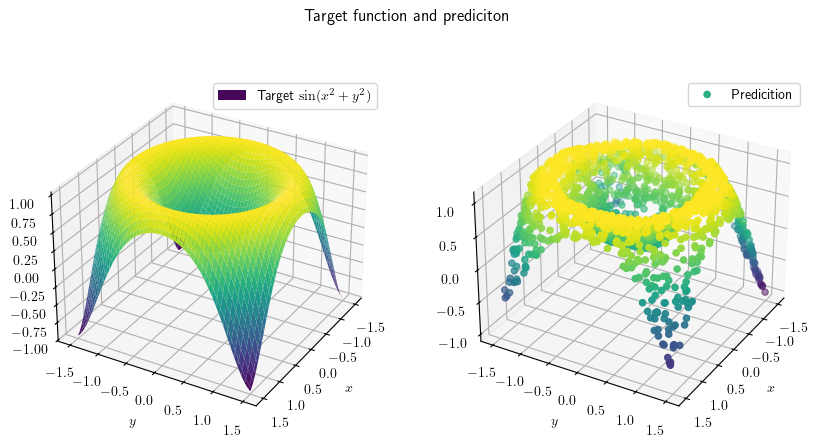

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Target function and prediciton')

# Grafico di sinistra: funzione target
ax1 = fig.add_subplot(121, projection='3d')
x1 = np.linspace(-1.5, 1.5, 100)
x2 = np.linspace(-1.5, 1.5, 100)
x1, x2 = np.meshgrid(x1, x2)
y = sin2D(x1, x2)

ax1.plot_surface(x1, x2, y, cmap='viridis', label='Target $\sin(x^2+y^2)$')
ax1.view_init(30, 30) 

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.legend()
ax1.grid(True)

# Grafico di destra: predizione
ax2 = fig.add_subplot(122, projection='3d')
x_predicted = 3*np.random.rand(2000, 2) - 1.5
y_predicted = model.predict(x_predicted)

ax2.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted[:,0], c=y_predicted[:,0], label='Predicition')
ax2.view_init(30, 30) 

ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.legend()
ax2.grid(True)

plt.show()